In [2]:
## Python 3.7 over, awkward1, numpy !

import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep

In [3]:
def Reader(directory,tuplelist,variable):
    count = 0
    for f in tuplelist:
        tuplelist[count] = np.load(""+ directory +"/"+ str(f) +"_nTuple.npy",allow_pickle=True)[()][''+ variable +'']
        count+=1
    return 0

In [4]:
def Normalizer(DATASET,XSECSET,GENEVTSET):
    if len(DATASET) != len(XSECSET) or len(DATASET) != len(GENEVTSET):
        print("ERROR -> list size not matched!")
        return -1
    
    Normed_SET = []
    Lumi = 3000000
    for i in range(len(DATASET)):
        Normed_SET.append(ak.ones_like(DATASET[i]) * float(XSECSET[i]) * Lumi / float(GENEVTSET[i]))
    return Normed_SET

In [5]:
## Define your filepath, target tuples and physical variable

## Target directory
filepath = "./JINYONGJIN"

## Target variable
variable = "NJet"

## Target samples
tuplelist = [
    "TT_had", # 0
    "TT_semi", # 1
    "TTW", # 2
    "TTZ", # 3
    "WW", # 4
    "WZ", # 5
    "ZZ", # 6
    "ST_t", # 7
    "ST_s", # 8
    "Signal" # 9
]

## Cross-section of each sample over Nevents
xseclist = [
    "210.5",
    "211.1",
    "1.13179",
    "0.88495",
    "78.09",
    "68.399",
    "15.909",
    "856.0",
    "67.69",
    "0.1" ### CONFIDENTIAL ###
]

## Total generated events
Neventlist = [
    "100000",
    "100000",
    "100000",
    "100000",
    "100000",
    "75268",
    "100000",
    "100000",
    "100000",
    "100000"
]

In [6]:
## Call your Reading Function
Reader(filepath,tuplelist,variable)
print(tuplelist)

[<Array [9, 6, 6, 8, 9, 6, ... 5, 7, 7, 7, 6, 7] type='100000 * int64'>, <Array [5, 7, 9, 7, 7, 4, ... 6, 8, 7, 5, 5, 7] type='100000 * int64'>, <Array [8, 12, 7, 6, 5, 8, ... 8, 6, 8, 4, 5] type='100000 * int64'>, <Array [8, 7, 6, 6, 7, 10, ... 6, 8, 8, 11, 7] type='100000 * int64'>, <Array [2, 6, 1, 4, 3, 3, ... 5, 3, 4, 4, 4, 4] type='100000 * int64'>, <Array [6, 7, 1, 5, 4, 6, ... 5, 6, 4, 3, 7, 3] type='75268 * int64'>, <Array [4, 3, 8, 1, 7, 5, ... 2, 4, 7, 2, 6, 6] type='100000 * int64'>, <Array [0, 4, 9, 4, 5, 4, ... 8, 7, 4, 6, 7, 2] type='100000 * int64'>, <Array [3, 5, 7, 4, 3, 6, ... 8, 5, 4, 3, 4, 4] type='100000 * int64'>, <Array [12, 7, 10, 7, 7, ... 11, 9, 9, 12, 8] type='100000 * int64'>]


In [7]:
## Set Normalize term
Weightlist = Normalizer(tuplelist,xseclist,Neventlist)
print(Weightlist)

[<Array [6.32e+03, 6.32e+03, ... 6.32e+03] type='100000 * float64'>, <Array [6.33e+03, 6.33e+03, ... 6.33e+03] type='100000 * float64'>, <Array [34, 34, 34, 34, 34, ... 34, 34, 34, 34] type='100000 * float64'>, <Array [26.5, 26.5, 26.5, ... 26.5, 26.5, 26.5] type='100000 * float64'>, <Array [2.34e+03, 2.34e+03, ... 2.34e+03] type='100000 * float64'>, <Array [2.73e+03, 2.73e+03, ... 2.73e+03] type='75268 * float64'>, <Array [477, 477, 477, 477, ... 477, 477, 477] type='100000 * float64'>, <Array [2.57e+04, 2.57e+04, ... 2.57e+04] type='100000 * float64'>, <Array [2.03e+03, 2.03e+03, ... 2.03e+03] type='100000 * float64'>, <Array [3, 3, 3, 3, 3, 3, ... 3, 3, 3, 3, 3, 3] type='100000 * float64'>]


In [8]:
## Top pair (FH)
TTH = np.array(tuplelist[0])
TTH_w = np.array(Weightlist[0])

## Top pair (1l)
TTL = np.array(tuplelist[1])
TTL_w = np.array(Weightlist[1])

## Signal example
SIG = np.array(tuplelist[9])
SIG_w = np.array(Weightlist[9])

In [9]:
## It is useful to merge your events using np.concatenate()

## Top pair + Boson
TTV = np.concatenate((tuplelist[2],tuplelist[3]))
TTV_w = np.concatenate((Weightlist[2],Weightlist[3]))

## Diboson
DIV = np.concatenate((tuplelist[4],tuplelist[5],tuplelist[6]))
DIV_w = np.concatenate((Weightlist[4],Weightlist[5],Weightlist[6]))

## Single top
ST = np.concatenate((tuplelist[7],tuplelist[8]))
ST_w = np.concatenate((Weightlist[7],Weightlist[8]))

In [10]:
## Now we can make a plotlist

BKG = [DIV,TTV,TTL,TTH,ST]
WEI = [DIV_w,TTV_w,TTL_w,TTH_w,ST_w]
COLOR=['lightgreen','grey','orange','blue','indigo']
EDGE = ['black','black','black','black','black']
LABEL=['Diboson','Top pair + V','Top pair (1$\ell$)','Top pair (FH)','Single top']

In [11]:
## 자주 사용하는 변수들은 미리 정의해둡니다.
RANGE = (0,20)
BIN = int(max(RANGE) / 1)

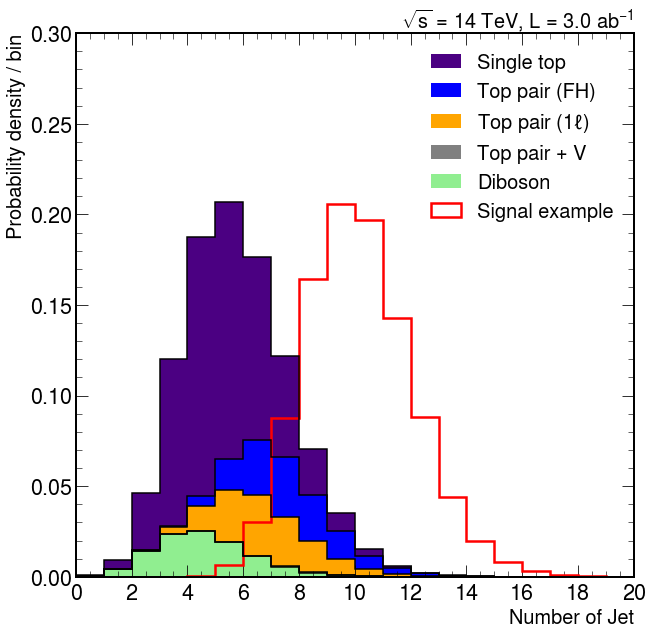

In [13]:
### Probability density

## Setting Axes
plt.xlim(0,20)
plt.ylim(0,0.3)
plt.xticks(ticks=np.arange(0,22,2))
plt.yticks(ticks=np.arange(0,0.35,0.05))

#plt.yscale('log')

## CMS style
plt.style.use(hep.style.CMS)

## Draw histogram, using density=True option
plt.hist(SIG,weights=SIG_w,range=RANGE,bins=BIN,label='Signal example',color='red',histtype='step',linewidth=2.5,density=True)
plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,label=LABEL,color=COLOR,density=True)

## Draw Edge!
plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,color=EDGE,histtype='step',linewidth=1.5,density=True)

## Set titles
plt.xlabel("Number of Jet",fontsize=20)
plt.ylabel("Probability density / bin",fontsize=20)
plt.title("$\sqrt{s}$ = 14 TeV, L = 3.0 ab$^{-1}$", loc='right',fontsize=20)

## Reversed Legend
current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels,fontsize=20,loc='upper right')
plt.show()

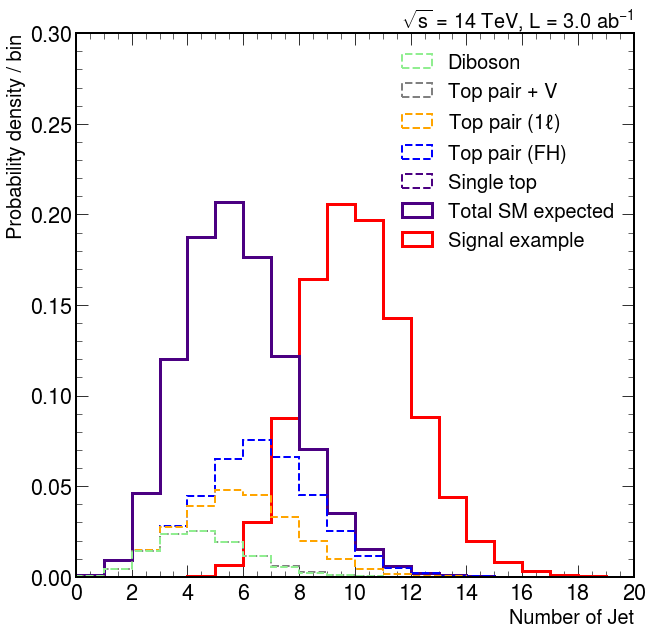

In [14]:
### Probability density

## Setting Axes
plt.xlim(0,20)
plt.ylim(0,0.3)
plt.xticks(ticks=np.arange(0,22,2))
plt.yticks(ticks=np.arange(0,0.35,0.05))

#plt.yscale('log')

## CMS style
plt.style.use(hep.style.CMS)

## Draw histogram, using density=True option
plt.hist(SIG,weights=SIG_w,range=RANGE,bins=BIN,label='Signal example',color='red',histtype='step',linewidth=3,density=True)

## 이거 버그가 아니라 Skill 인데...
plt.hist(
    np.concatenate(BKG),
    weights=np.concatenate(WEI),
    stacked=True,range=RANGE,
    bins=BIN,
    label='Total SM expected',
    color='indigo',
    histtype='step',
    linewidth=3,
    density=True)

plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,label=LABEL,color=COLOR,histtype='step',linewidth=2,linestyle='--',density=True)

## Draw Edge!
#plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,color=EDGE,histtype='step',linewidth=1.5,density=True)

## Set titles
plt.xlabel("Number of Jet",fontsize=20)
plt.ylabel("Probability density / bin",fontsize=20)
plt.title("$\sqrt{s}$ = 14 TeV, L = 3.0 ab$^{-1}$", loc='right',fontsize=20)

## Reversed Legend
current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels,fontsize=20,loc='upper right')
plt.show()